In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from datetime import datetime 

In [2]:
city_df = pd.read_csv("../Resources/cleaned_canada_pop_2011_2016.csv")
city_df.head()

,city_name,city_size_type,city_type,province,pop_2016,city_size,pop_density
0,Acton,"Small population centre (1,000 to 29,999)",Fringe,Ontario,9462.0,7.80,1213.2
1,Acton Vale,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Quebec,5399.0,4.30,1254.2
2,Airdrie,"Medium population centre (30,000 to 99,999)",Secondary core,Alberta,61082.0,32.78,1863.2
3,Alençon,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Quebec,1562.0,2.94,530.4
4,Alexandria,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Ontario,2845.0,2.07,1375.1


In [3]:
housing_price_df = pd.read_csv("../Resources/price_index_clean.csv")
housing_price_df.head()

,housingprice_index,REF_DATE,City,Province,Housing_Type,PRICE_INDEX
0,0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37
1,1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31
2,2,1981-01-01,Saint John,Fredericton,House only,61
3,3,1981-01-01,Saint John,Fredericton,Land only,38
4,4,1981-01-01,Québec,Quebec,House only,34


In [4]:
city_df.head()


,city_name,city_size_type,city_type,province,pop_2016,city_size,pop_density
0,Acton,"Small population centre (1,000 to 29,999)",Fringe,Ontario,9462.0,7.80,1213.2
1,Acton Vale,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Quebec,5399.0,4.30,1254.2
2,Airdrie,"Medium population centre (30,000 to 99,999)",Secondary core,Alberta,61082.0,32.78,1863.2
3,Alençon,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Quebec,1562.0,2.94,530.4
4,Alexandria,"Small population centre (1,000 to 29,999)",Population centre outside metropolitan area / ...,Ontario,2845.0,2.07,1375.1


In [5]:
housing_price_df = housing_price_df.drop(columns = ["housingprice_index"])
housing_price_df.head()

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31
2,1981-01-01,Saint John,Fredericton,House only,61
3,1981-01-01,Saint John,Fredericton,Land only,38
4,1981-01-01,Québec,Quebec,House only,34


In [6]:
# Merging the Various databases 
combined_df_1 = pd.merge(housing_price_df, city_df,  how='inner', left_on=['City','Province'], right_on = ['city_name','province'])
combined_df_1.head()

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_name,city_size_type,city_type,province,pop_2016,city_size,pop_density
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,St. John's,"Large urban population centre (100,000 or more)",Core,Newfoundland and Labrador,178427.0,166.0,1074.9
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,St. John's,"Large urban population centre (100,000 or more)",Core,Newfoundland and Labrador,178427.0,166.0,1074.9
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,St. John's,"Large urban population centre (100,000 or more)",Core,Newfoundland and Labrador,178427.0,166.0,1074.9
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,St. John's,"Large urban population centre (100,000 or more)",Core,Newfoundland and Labrador,178427.0,166.0,1074.9
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,St. John's,"Large urban population centre (100,000 or more)",Core,Newfoundland and Labrador,178427.0,166.0,1074.9


In [7]:
combined_df_1 = combined_df_1.drop(columns = ["city_name" , "province"])
combined_df_1

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,city_type,pop_2016,city_size,pop_density
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
...,...,...,...,...,...,...,...,...,...,...
15219,2020-05-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15220,2020-06-01,Kelowna,British Columbia,House only,105,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15221,2020-06-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15222,2020-07-01,Kelowna,British Columbia,House only,106,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8


In [8]:
# Utilizing Combined_df_1 dataset instead of combined_df_2 (aka neglecting number of units available/sold/unsold)
# Find duplicated entries 
print(f"Duplication entries: {combined_df_1.duplicated().sum()}")
combined_df_1 = combined_df_1.drop_duplicates()
combined_df_1

Duplication entries: 0


,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,city_type,pop_2016,city_size,pop_density
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",Core,178427.0,166.00,1074.9
...,...,...,...,...,...,...,...,...,...,...
15219,2020-05-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15220,2020-06-01,Kelowna,British Columbia,House only,105,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15221,2020-06-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8
15222,2020-07-01,Kelowna,British Columbia,House only,106,"Large urban population centre (100,000 or more)",Core,151957.0,136.44,1113.8


In [9]:
city_counts = combined_df_1.City.value_counts()
city_counts

London            950
Saskatoon         950
Windsor           950
Victoria          950
Regina            950
Hamilton          950
Vancouver         950
Winnipeg          950
Toronto           950
St. John's        950
Québec            950
Edmonton          950
Montréal          950
Calgary           950
Halifax           870
Charlottetown     614
Guelph             88
Oshawa             88
Sherbrooke         88
Trois-Rivières     88
Kelowna            88
Name: City, dtype: int64

In [10]:
province_counts = combined_df_1.Province.value_counts()
province_counts

Ontario                      3976
Quebec                       2076
British Columbia             1988
Alberta                      1900
Saskatchewan                 1900
Newfoundland and Labrador     950
Manitoba                      950
Nova Scotia                   870
Prince Edward Island          614
Name: Province, dtype: int64

In [11]:
house_type_counts = combined_df_1.Housing_Type.value_counts()
house_type_counts

Land only     7612
House only    7612
Name: Housing_Type, dtype: int64

In [12]:
city_size_type_count = combined_df_1.city_size_type.value_counts()
city_size_type_count

Large urban population centre (100,000 or more)    14610
Medium population centre (30,000 to 99,999)          614
Name: city_size_type, dtype: int64

In [13]:
city_type = combined_df_1.city_type.value_counts()
city_type

Core    15224
Name: city_type, dtype: int64

In [14]:
combined_df_1 = combined_df_1.drop(columns = ["city_type"])
combined_df_1

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,pop_2016,city_size,pop_density
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9
...,...,...,...,...,...,...,...,...,...
15219,2020-05-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8
15220,2020-06-01,Kelowna,British Columbia,House only,105,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8
15221,2020-06-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8
15222,2020-07-01,Kelowna,British Columbia,House only,106,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8


In [15]:
combined_df_1["REF_DATE"] = combined_df_1["REF_DATE"].astype("datetime64")

In [16]:
# Adding time from 1981-01-01
start_date = datetime(1981,1,1)
start_date

datetime.datetime(1981, 1, 1, 0, 0)

In [17]:
combined_df_1['time_delta'] = combined_df_1['REF_DATE']-start_date
combined_df_1

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,pop_2016,city_size,pop_density,time_delta
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,0 days
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,0 days
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,31 days
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,31 days
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,59 days
...,...,...,...,...,...,...,...,...,...,...
15219,2020-05-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,14365 days
15220,2020-06-01,Kelowna,British Columbia,House only,105,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,14396 days
15221,2020-06-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,14396 days
15222,2020-07-01,Kelowna,British Columbia,House only,106,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,14426 days


In [18]:
combined_df_1["time_delta"] = combined_df_1["time_delta"].astype("int64")
combined_df_1.dtypes

REF_DATE          datetime64[ns]
City                      object
Province                  object
Housing_Type              object
PRICE_INDEX                int64
city_size_type            object
pop_2016                 float64
city_size                float64
pop_density              float64
time_delta                 int64
dtype: object

In [19]:
combined_df_1

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,pop_2016,city_size,pop_density,time_delta
0,1981-01-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,0
1,1981-01-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,0
2,1981-02-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,2678400000000000
3,1981-02-01,St. John's,Newfoundland and Labrador,Land only,31,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,2678400000000000
4,1981-03-01,St. John's,Newfoundland and Labrador,House only,37,"Large urban population centre (100,000 or more)",178427.0,166.00,1074.9,5097600000000000
...,...,...,...,...,...,...,...,...,...,...
15219,2020-05-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,1241136000000000000
15220,2020-06-01,Kelowna,British Columbia,House only,105,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,1243814400000000000
15221,2020-06-01,Kelowna,British Columbia,Land only,101,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,1243814400000000000
15222,2020-07-01,Kelowna,British Columbia,House only,106,"Large urban population centre (100,000 or more)",151957.0,136.44,1113.8,1246406400000000000


In [20]:
# Isolate for specific province
province = "Ontario"
combined_df_4 = combined_df_1[(combined_df_1["Province"] == province) & (combined_df_1["Housing_Type"] == "House only")]
combined_df_4

#combined_df_4 = combined_df_1[combined_df_1["Housing_Type"] == "House only"]
#combined_df_4

,REF_DATE,City,Province,Housing_Type,PRICE_INDEX,city_size_type,pop_2016,city_size,pop_density,time_delta
2850,1981-01-01,Toronto,Ontario,House only,22,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,0
2852,1981-02-01,Toronto,Ontario,House only,23,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,2678400000000000
2854,1981-03-01,Toronto,Ontario,House only,24,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,5097600000000000
2856,1981-04-01,Toronto,Ontario,House only,26,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,7776000000000000
2858,1981-05-01,Toronto,Ontario,House only,27,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,10368000000000000
...,...,...,...,...,...,...,...,...,...,...
15126,2020-03-01,Guelph,Ontario,House only,109,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1235865600000000000
15128,2020-04-01,Guelph,Ontario,House only,109,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1238544000000000000
15130,2020-05-01,Guelph,Ontario,House only,110,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1241136000000000000
15132,2020-06-01,Guelph,Ontario,House only,111,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1243814400000000000


In [21]:
combined_df_4["Month"] = pd.DatetimeIndex(combined_df_4['REF_DATE']).month
combined_df_4[['month']] = combined_df_4[['Month']].astype('str')
combined_df_4.drop(columns = ["Month", "City", "Province", "Housing_Type"], inplace = True)
combined_df_4 = combined_df_4.reset_index()
combined_df_4.drop(columns = ["index"], inplace = True)
combined_df_4

C:\Users\quint\anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\quint\anaconda3\envs\py3.7\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\quint\anaconda3\envs\py3.7\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,REF_DATE,PRICE_INDEX,city_size_type,pop_2016,city_size,pop_density,time_delta,month
0,1981-01-01,22,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,0,1
1,1981-02-01,23,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,2678400000000000,2
2,1981-03-01,24,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,5097600000000000,3
3,1981-04-01,26,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,7776000000000000,4
4,1981-05-01,27,"Large urban population centre (100,000 or more)",5429524.0,1792.99,3028.2,10368000000000000,5
...,...,...,...,...,...,...,...,...
1983,2020-03-01,109,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1235865600000000000,3
1984,2020-04-01,109,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1238544000000000000,4
1985,2020-05-01,110,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1241136000000000000,5
1986,2020-06-01,111,"Large urban population centre (100,000 or more)",132397.0,74.10,1786.7,1243814400000000000,6


In [22]:
combined_df_4.dtypes

REF_DATE          datetime64[ns]
PRICE_INDEX                int64
city_size_type            object
pop_2016                 float64
city_size                float64
pop_density              float64
time_delta                 int64
month                     object
dtype: object

In [23]:
# Generate our categorical variable list
cat = combined_df_4.dtypes[combined_df_4.dtypes == "object"].index.tolist()
cat

['city_size_type', 'month']

In [24]:
# Begining encoding with OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(combined_df_4[cat]))
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

,"city_size_type_Large urban population centre (100,000 or more)",month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
final_df = pd.merge(combined_df_4, encode_df, left_index=True, right_index=True)
final_df = final_df.drop(cat,1)
final_df.head()

,REF_DATE,PRICE_INDEX,pop_2016,city_size,pop_density,time_delta,"city_size_type_Large urban population centre (100,000 or more)",month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1981-01-01,22,5429524.0,1792.99,3028.2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1981-02-01,23,5429524.0,1792.99,3028.2,2678400000000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1981-03-01,24,5429524.0,1792.99,3028.2,5097600000000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1981-04-01,26,5429524.0,1792.99,3028.2,7776000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1981-05-01,27,5429524.0,1792.99,3028.2,10368000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
final_df = final_df.reset_index()
final_df.drop(columns = "index", inplace = True)
final_df

,REF_DATE,PRICE_INDEX,pop_2016,city_size,pop_density,time_delta,"city_size_type_Large urban population centre (100,000 or more)",month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1981-01-01,22,5429524.0,1792.99,3028.2,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1981-02-01,23,5429524.0,1792.99,3028.2,2678400000000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1981-03-01,24,5429524.0,1792.99,3028.2,5097600000000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1981-04-01,26,5429524.0,1792.99,3028.2,7776000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1981-05-01,27,5429524.0,1792.99,3028.2,10368000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2020-03-01,109,132397.0,74.10,1786.7,1235865600000000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,2020-04-01,109,132397.0,74.10,1786.7,1238544000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1985,2020-05-01,110,132397.0,74.10,1786.7,1241136000000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1986,2020-06-01,111,132397.0,74.10,1786.7,1243814400000000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
final_df.drop(columns = ["pop_2016", "city_size", "pop_density"], inplace = True)

In [28]:
# Split our data into pre and after covid 
covid_start_date_cutoff = datetime(2020,3,1)
final_df_prior = final_df[final_df["REF_DATE"] < covid_start_date_cutoff].reset_index()
final_df_after = final_df[final_df["REF_DATE"] >= covid_start_date_cutoff].reset_index()

final_df_prior.drop(columns = ["REF_DATE"], inplace = True)
final_df_after.drop(columns = ["REF_DATE"] , inplace = True)


In [29]:
# Split our processed data into our features and target arrays
y = final_df_prior["PRICE_INDEX"].values
X = final_df_prior.drop(["PRICE_INDEX"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
# Standardize the data using StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Define the model - deep neural net with relu 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 2 
hidden_nodes_layer2 = hidden_nodes_layer1 / 2 

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path_1 = "checkpoints/weights_nn1.{epoch:02d}.hdf5"



In [39]:
# Compile the model with nn_1
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path_1,
    verbose=1,
    save_weights_only=True,
    save_freq=25724)

# Train the model
fit_model_1 = nn_1.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 1468 samples
Epoch 1/100
1468/1468 [==============================] - 0s 257us/sample - loss: 485.3422 - accuracy: 0.0000e+00
Epoch 2/100
1468/1468 [==============================] - 0s 36us/sample - loss: -50.4806 - accuracy: 0.0000e+00
Epoch 3/100
1468/1468 [==============================] - 0s 35us/sample - loss: -171.4608 - accuracy: 0.0000e+00
Epoch 4/100
1468/1468 [==============================] - 0s 34us/sample - loss: -371.3804 - accuracy: 0.0000e+00
Epoch 5/100
1468/1468 [==============================] - 0s 35us/sample - loss: -709.8576 - accuracy: 0.0000e+00
Epoch 6/100
1468/1468 [==============================] - 0s 37us/sample - loss: -960.9316 - accuracy: 0.0000e+00
Epoch 7/100
1468/1468 [==============================] - 0s 39us/sample - loss: -1032.9777 - accuracy: 0.0000e+00
Epoch 8/100
1468/1468 [==============================] - 0s 37us/sample - loss: -1048.4516 - accuracy: 0.0000e+00
Epoch 9/100
1468/1468 [==============================] - 0s 32us/sample -

1468/1468 [==============================] - 0s 35us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 69/100
1468/1468 [==============================] - 0s 34us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 70/100
1468/1468 [==============================] - 0s 34us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 71/100
  32/1468 [..............................] - ETA: 0s - loss: -1024.0815 - accuracy: 0.0000e+00
Epoch 00071: saving model to checkpoints/weights_nn1.71.hdf5
1468/1468 [==============================] - 0s 40us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 72/100
1468/1468 [==============================] - 0s 35us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 73/100
1468/1468 [==============================] - 0s 33us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 74/100
1468/1468 [==============================] - 0s 34us/sample - loss: -1049.8913 - accuracy: 0.0000e+00
Epoch 75/100
1468/1468 [============================

<AxesSubplot:>

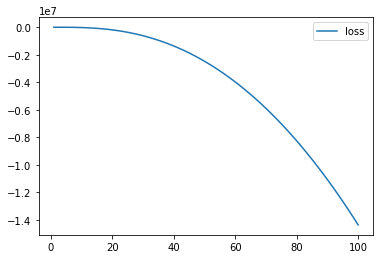

In [34]:
# Create a DataFrame containing training history
history_df_1 = pd.DataFrame(fit_model_1.history, index=range(1,len(fit_model_1.history["loss"])+1))

# Plot the loss
history_df_1.plot(y="loss")

<AxesSubplot:>

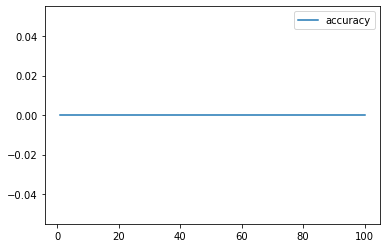

In [35]:
# Plot the accuracy
history_df_1.plot(y="accuracy")

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Relu Nueral Network:\nLoss: {model_loss}, Accuracy: {model_accuracy}")

490/490 - 0s - loss: -1.3807e+07 - accuracy: 0.0000e+00
Relu Nueral Network:
Loss: -13807003.616326531, Accuracy: 0.0
